In [1]:
# Import packages

import pandas as pd 
import numpy as np 
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import statsmodels.api as sm
from scipy import stats

from joblib import dump, load

pd.set_option('display.max_columns', None)

In [2]:
nfl = pd.read_csv('../../data/nfl_game_by_game_raw_stats.csv')

In [3]:
nfl.head()

Unnamed: 0.1  Unnamed: 0  season  week team opponent  score  \
0             0           0    2014     1  ARI      LAC     18   
1             1           1    2014     1  ATL       NO     37   
2             2           2    2014     1  BAL      CIN     16   
3             3           3    2014     1  BUF      CHI     23   
4             4           4    2014     1  CAR       TB     20   

   opponent_score           qb  total_pass_attempts  total_passing_yards  \
0              17    C. Palmer                   38                304.0   
1              34      M. Ryan                   42                448.0   
2              23    J. Flacco                   62                345.0   
3              20    E. Manuel                   22                173.0   
4              14  D. Anderson                   33                230.0   

   completions  passing_epa  pass_tds  air_yards  yards_after_catch  \
0         24.0     6.098425       2.0      196.0              108.0   
1         31.0    17.253965       3.0      253.0              195.0   
2         35.0    -4.871386       1.0      221.0              124.0   
3         16.0     0.368607       1.0       93.0               80.0   
4         24.0     8.423189       2.0      160.0               70.0   

     air_epa    yac_epa   avg_cpoe  total_rushes  total_rush_yards  \
0  10.800692  13.884696   3.160065            26             110.0   
1   8.815695  16.383532   6.128030            25             123.0   
2  10.962930  14.313325 -11.889451            21              94.0   
3   1.909633   9.530254  11.150598            31             197.0   
4   6.298791  10.724494   9.822589            33             113.0   

   rushing_epa  rush_tds     qb_epa  qb_rush_yards  qb_rushing_epa  \
0    -7.697317       0.0   7.779733           30.0        1.681309   
1     2.559394       1.0  24.116820           15.0        0.272050   
2    -0.093163       1.0  -3.078329            7.0        1.793058   
3     4.315138       1.0   0.591515           23.0        0.222908   
4    -6.247634       0.0  10.352312           10.0        1.929123   

   qb_rush_tds  total_qb_rush_attempts  sacks_taken_qb  qb_hits_taken_qb  \
0          0.0                     3.0             2.0               4.0   
1          0.0                     3.0             1.0               4.0   
2          0.0                     3.0             3.0               6.0   
3          1.0                     4.0             1.0               3.0   
4          0.0                     3.0             1.0               3.0   

   fumbles_qb  lost_fumbles_qb  interceptions_thrown_qb  sacks_allowed_team  \
0         1.0              1.0                      0.0                 2.0   
1         1.0              1.0                      0.0                 1.0   
2         0.0              0.0                      1.0                 3.0   
3         0.0              0.0                      1.0                 1.0   
4         1.0              0.0                      0.0                 1.0   

   qb_hits_allowed_team  fumbles_team  lost_fumbles_team  \
0                   4.0           2.0                2.0   
1                   4.0           1.0                1.0   
2                   6.0           1.0                1.0   
3                   3.0           0.0                0.0   
4                   3.0           1.0                0.0   

   interceptions_thrown_team  total_rushes_allowed  total_rush_yards_allowed  \
0                        0.0                    24                      52.0   
1                        0.0                    28                     139.0   
2                        1.0                    24                      81.0   
3                        1.0                    18                      86.0   
4                        0.0                    17                     102.0   

   rushing_epa_allowed  rush_tds_allowed  total_pass_attempts_allowed  \
0            -8.805075           

In [4]:
# Get extra stats

extra = nfl.copy()
extra = extra[['season', 'week', 'team', 'opponent', 'score', 'opponent_score', 'total_plays', 'total_possession_time_seconds',
              'pass_percentage', 'run_percentage']]
extra = extra.drop_duplicates()
extra

season  week team opponent  score  opponent_score  total_plays  \
0       2014     1  ARI      LAC     18              17         67.0   
1       2014     1  ATL       NO     37              34         72.0   
2       2014     1  BAL      CIN     16              23         87.0   
3       2014     1  BUF      CHI     23              20         59.0   
4       2014     1  CAR       TB     20              14         71.0   
...      ...   ...  ...      ...    ...             ...          ...   
5864    2022    21   KC      CIN     23              20         69.0   
5865    2022    21  PHI       SF     31               7         71.0   
5866    2022    21   SF      PHI      7              31         45.0   
5869    2022    22   KC      PHI     38              35         55.0   
5870    2022    22  PHI       KC     35              38         74.0   

      total_possession_time_seconds  pass_percentage  run_percentage  
0                            1909.0         0.606061        0.393939  
1                            1878.0         0.632353        0.367647  
2                            1770.0         0.755814        0.244186  
3                            1832.0         0.425926        0.574074  
4                            2112.0         0.507463        0.492537  
...                             ...              ...             ...  
5864                         1971.0         0.696970        0.303030  
5865                         2246.0         0.382353        0.617647  
5866                         1354.0         0.466667        0.533333  
5869                         1453.0         0.529412        0.470588  
5870                         2147.0         0.547945        0.452055  

[4880 rows x 10 columns]

<Axes: ylabel='Frequency'>

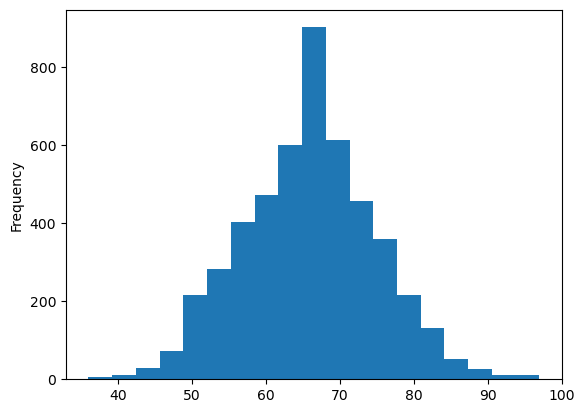

In [5]:
extra.total_plays.plot.hist(bins=19)

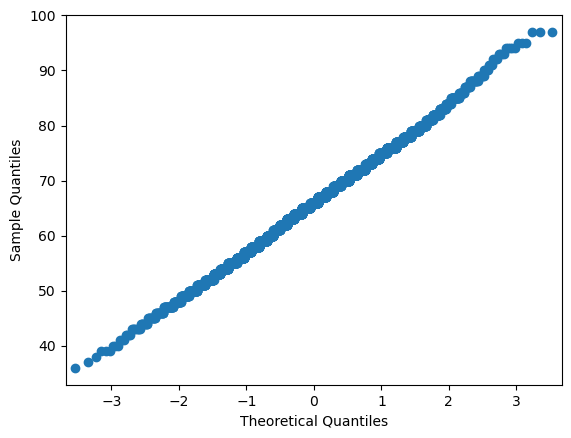

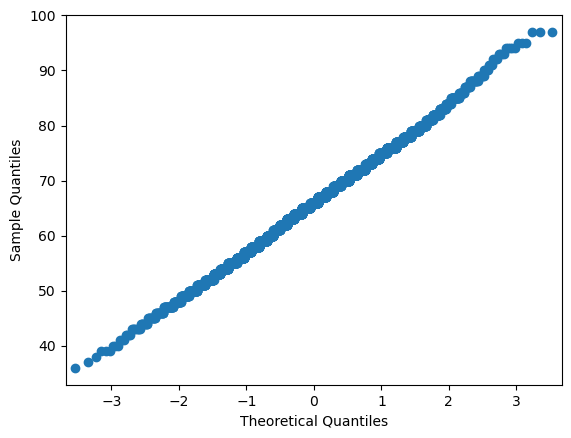

In [6]:
sm.qqplot(extra.total_plays)

<Axes: ylabel='Frequency'>

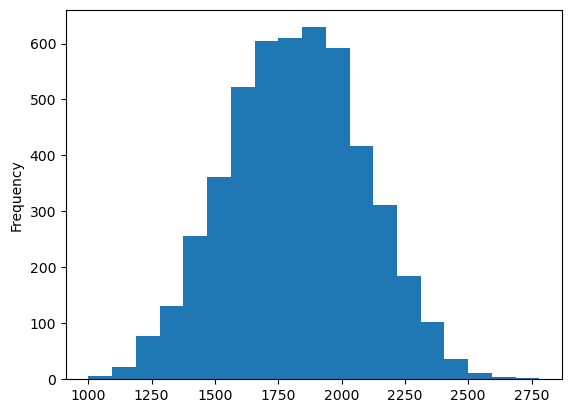

In [7]:
extra.total_possession_time_seconds.plot.hist(bins=19)

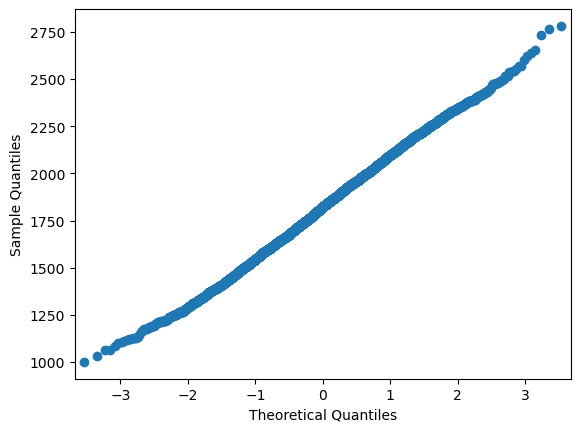

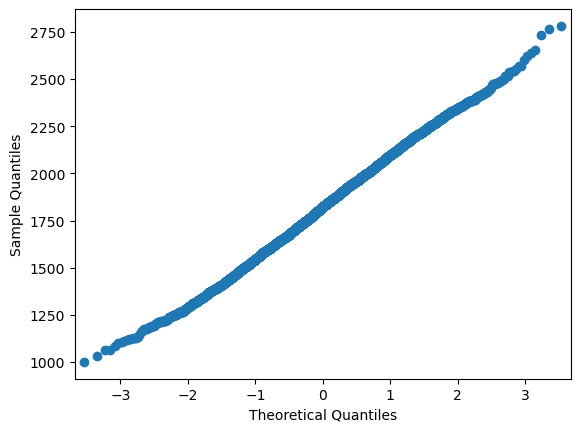

In [8]:
sm.qqplot(extra.total_possession_time_seconds)

<Axes: ylabel='Frequency'>

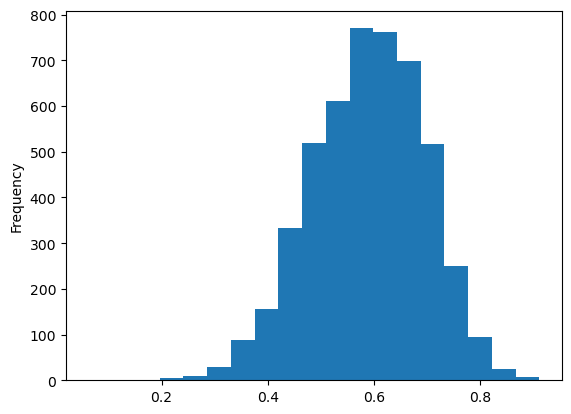

In [9]:
extra.pass_percentage.plot.hist(bins=19)

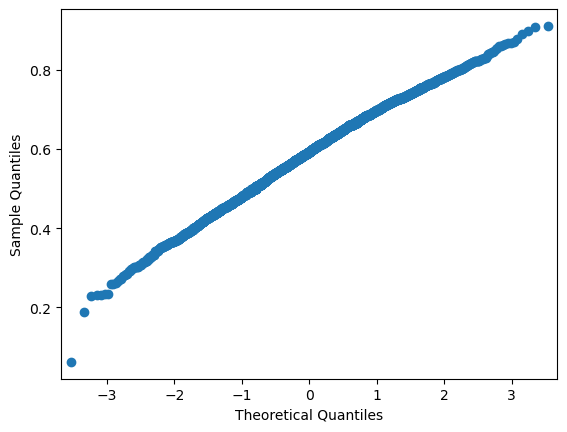

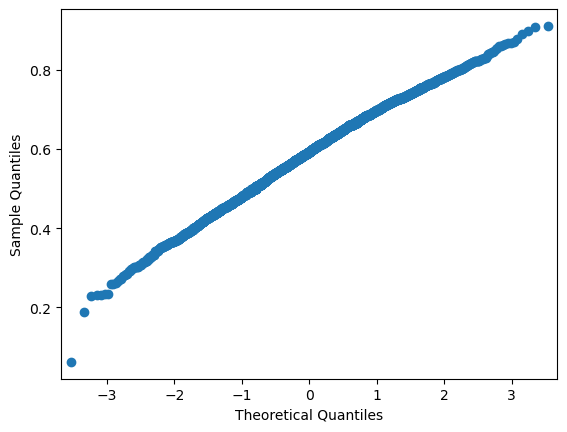

In [10]:
sm.qqplot(extra.pass_percentage)

<Axes: ylabel='Frequency'>

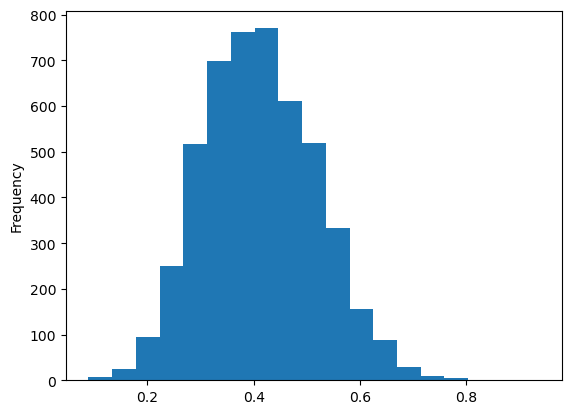

In [11]:
extra.run_percentage.plot.hist(bins=19)

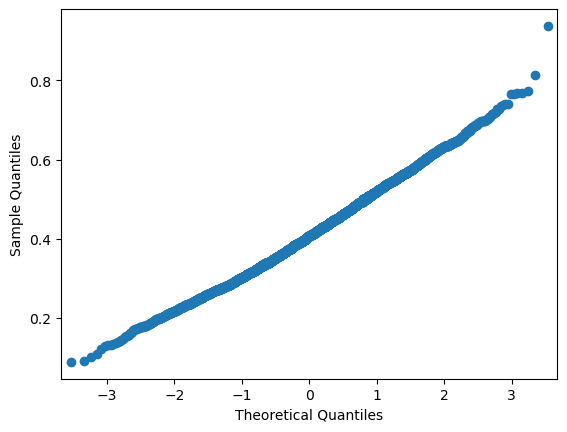

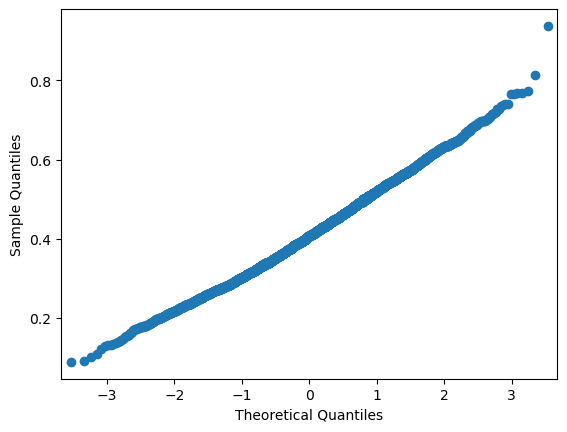

In [12]:
sm.qqplot(extra.run_percentage)

In [13]:
extra[extra.run_percentage < .9]

season  week team opponent  score  opponent_score  total_plays  \
0       2014     1  ARI      LAC     18              17         67.0   
1       2014     1  ATL       NO     37              34         72.0   
2       2014     1  BAL      CIN     16              23         87.0   
3       2014     1  BUF      CHI     23              20         59.0   
4       2014     1  CAR       TB     20              14         71.0   
...      ...   ...  ...      ...    ...             ...          ...   
5864    2022    21   KC      CIN     23              20         69.0   
5865    2022    21  PHI       SF     31               7         71.0   
5866    2022    21   SF      PHI      7              31         45.0   
5869    2022    22   KC      PHI     38              35         55.0   
5870    2022    22  PHI       KC     35              38         74.0   

      total_possession_time_seconds  pass_percentage  run_percentage  
0                            1909.0         0.606061        0.393939  
1                            1878.0         0.632353        0.367647  
2                            1770.0         0.755814        0.244186  
3                            1832.0         0.425926        0.574074  
4                            2112.0         0.507463        0.492537  
...                             ...              ...             ...  
5864                         1971.0         0.696970        0.303030  
5865                         2246.0         0.382353        0.617647  
5866                         1354.0         0.466667        0.533333  
5869                         1453.0         0.529412        0.470588  
5870                         2147.0         0.547945        0.452055  

[4879 rows x 10 columns]

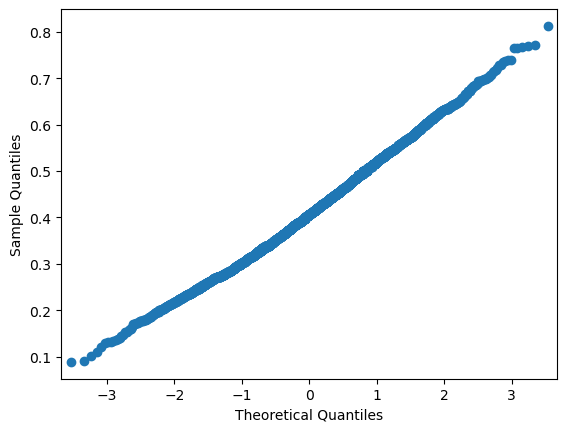

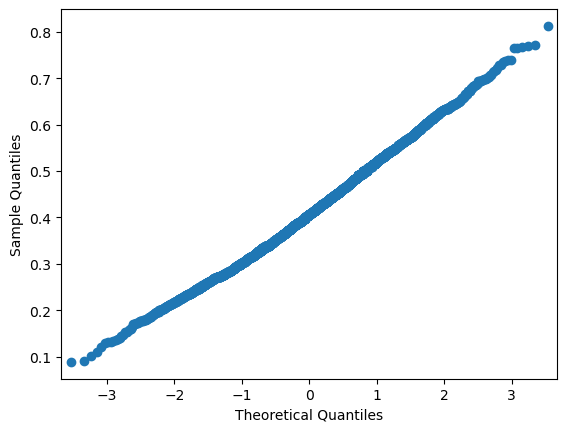

In [14]:
sm.qqplot(extra[extra.run_percentage < .9].run_percentage)

In [15]:
# Removing some outliers

extra_no_outliers = extra.copy()
extra_no_outliers = extra_no_outliers[extra_no_outliers.run_percentage < .9]
extra_no_outliers

season  week team opponent  score  opponent_score  total_plays  \
0       2014     1  ARI      LAC     18              17         67.0   
1       2014     1  ATL       NO     37              34         72.0   
2       2014     1  BAL      CIN     16              23         87.0   
3       2014     1  BUF      CHI     23              20         59.0   
4       2014     1  CAR       TB     20              14         71.0   
...      ...   ...  ...      ...    ...             ...          ...   
5864    2022    21   KC      CIN     23              20         69.0   
5865    2022    21  PHI       SF     31               7         71.0   
5866    2022    21   SF      PHI      7              31         45.0   
5869    2022    22   KC      PHI     38              35         55.0   
5870    2022    22  PHI       KC     35              38         74.0   

      total_possession_time_seconds  pass_percentage  run_percentage  
0                            1909.0         0.606061        0.393939  
1                            1878.0         0.632353        0.367647  
2                            1770.0         0.755814        0.244186  
3                            1832.0         0.425926        0.574074  
4                            2112.0         0.507463        0.492537  
...                             ...              ...             ...  
5864                         1971.0         0.696970        0.303030  
5865                         2246.0         0.382353        0.617647  
5866                         1354.0         0.466667        0.533333  
5869                         1453.0         0.529412        0.470588  
5870                         2147.0         0.547945        0.452055  

[4879 rows x 10 columns]

In [16]:
# Total plays

total_plays_mean = np.mean(extra_no_outliers.total_plays)
total_plays_std = np.std(extra_no_outliers.total_plays)
extra['total_plays_standardized'] = extra.apply(lambda x: (x.total_plays - total_plays_mean)/total_plays_std, axis=1)

# Total possession time

total_possession_time_mean = np.mean(extra_no_outliers.total_possession_time_seconds)
total_possession_time_std = np.std(extra_no_outliers.total_possession_time_seconds)
extra['total_possession_time_standardized'] = extra.apply(lambda x: (x.total_possession_time_seconds - total_possession_time_mean)/total_possession_time_std, axis=1)

# Pass percentage

pass_percentage_mean = np.mean(extra_no_outliers.pass_percentage)
pass_percentage_std = np.std(extra_no_outliers.pass_percentage)
extra['pass_percentage_standardized'] = extra.apply(lambda x: (x.pass_percentage - pass_percentage_mean)/pass_percentage_std, axis=1)

# Run percentage

# run_percentage_mean = np.mean(extra_no_outliers.run_percentage)
# run_percentage_std = np.std(extra_no_outliers.run_percentage)
# extra['run_percentage_standardized'] = extra.apply(lambda x: (x.run_percentage - run_percentage_mean)/run_percentage_std, axis=1)


In [17]:
extra

season  week team opponent  score  opponent_score  total_plays  \
0       2014     1  ARI      LAC     18              17         67.0   
1       2014     1  ATL       NO     37              34         72.0   
2       2014     1  BAL      CIN     16              23         87.0   
3       2014     1  BUF      CHI     23              20         59.0   
4       2014     1  CAR       TB     20              14         71.0   
...      ...   ...  ...      ...    ...             ...          ...   
5864    2022    21   KC      CIN     23              20         69.0   
5865    2022    21  PHI       SF     31               7         71.0   
5866    2022    21   SF      PHI      7              31         45.0   
5869    2022    22   KC      PHI     38              35         55.0   
5870    2022    22  PHI       KC     35              38         74.0   

      total_possession_time_seconds  pass_percentage  run_percentage  \
0                            1909.0         0.606061        0.393939   
1                            1878.0         0.632353        0.367647   
2                            1770.0         0.755814        0.244186   
3                            1832.0         0.425926        0.574074   
4                            2112.0         0.507463        0.492537   
...                             ...              ...             ...   
5864                         1971.0         0.696970        0.303030   
5865                         2246.0         0.382353        0.617647   
5866                         1354.0         0.466667        0.533333   
5869                         1453.0         0.529412        0.470588   
5870                         2147.0         0.547945        0.452055   

      total_plays_standardized  total_possession_time_standardized  \
0                     0.122744                            0.332304   
1                     0.683585                            0.216847   
2                     2.366110                           -0.185390   
3                    -0.774603                            0.045524   
4                     0.571417                            1.088360   
...                        ...                                 ...   
5864                  0.347080                            0.563217   
5865                  0.571417                            1.587432   
5866                 -2.344959                           -1.734748   
5869                 -1.223276                           -1.366030   
5870                  0.907922                            1.218715   

      pass_percentage_standardized  
0                         0.156718  
1                         0.405160  
2                         1.571768  
3                        -1.545411  
4                        -0.774954  
...                            ...  
5864                      1.015737  
5865                     -1.957141  
5866                     -1.160443  
5869                     -0.567552  
5870                     -0.392426  

[4880 rows x 13 columns]

In [18]:
extra_to_save = extra.copy()
extra_to_save.to_csv('extra_data/extra_values.csv')